In [95]:
from apad_env import APADEnv
from sb3_contrib import MaskablePPO
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy import stats
import pandas as pd

In [96]:
model = MaskablePPO.load("apad_mppo_model")

In [97]:
env = APADEnv()
obs, _ = env.reset()

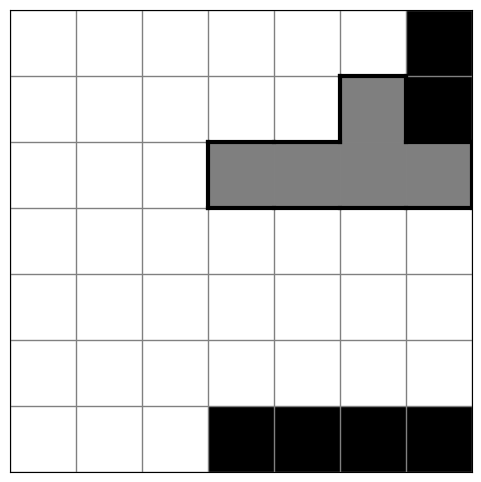

In [4]:
action, _ = model.predict(obs, deterministic=True)
env.step(action)
env.visualize()

In [108]:
def test_complete_game(model, env):
    obs, info = env.reset()
    total_reward = 0
    step_count = 0
    
    while True:
        # Force fresh action masks
        action_masks = env.action_masks()
        
        if not np.any(action_masks):
            print(f"No valid actions at step {step_count}")
            break
            
        action, _ = model.predict(obs, action_masks=action_masks, deterministic=False)
        
        if not action_masks[action]:
            print(f"Invalid action {action}")
            valid_actions = np.where(action_masks)[0]
            action = np.random.choice(valid_actions)
        
        obs, reward, done, truncated, info = env.step(action)
        total_reward += reward
        step_count += 1
        
        print(f"Step {step_count}: Action {action}, Reward {reward}, Total {total_reward}")
        
        if done or truncated:
            print(f"Game ended: {'Win' if done else 'Loss'}")
            break
    
    print(f"Final score: {total_reward}, Steps: {step_count}")
    return total_reward, step_count

1
Step 1: Action 2583, Reward 20, Total 20
Step 2: Action 676, Reward 20, Total 40
Step 3: Action 1705, Reward -20, Total 20
Game ended: Loss
Final score: 20, Steps: 3
2
Step 1: Action 1428, Reward 20, Total 20
Step 2: Action 1920, Reward 20, Total 40
Step 3: Action 330, Reward -20, Total 20
Game ended: Loss
Final score: 20, Steps: 3
3
Step 1: Action 395, Reward 20, Total 20
Step 2: Action 2169, Reward 20, Total 40
Step 3: Action 889, Reward 20, Total 60
Step 4: Action 1658, Reward 20, Total 80
Step 5: Action 2021, Reward 20, Total 100
Step 6: Action 1336, Reward -20, Total 80
Game ended: Loss
Final score: 80, Steps: 6
4
Step 1: Action 53, Reward 20, Total 20
Step 2: Action 852, Reward 20, Total 40
Step 3: Action 2731, Reward 20, Total 60
Step 4: Action 1100, Reward 20, Total 80
Step 5: Action 604, Reward -20, Total 60
Game ended: Loss
Final score: 60, Steps: 5
5
Step 1: Action 1133, Reward 20, Total 20
Step 2: Action 2082, Reward 20, Total 40
Step 3: Action 852, Reward 20, Total 60
St

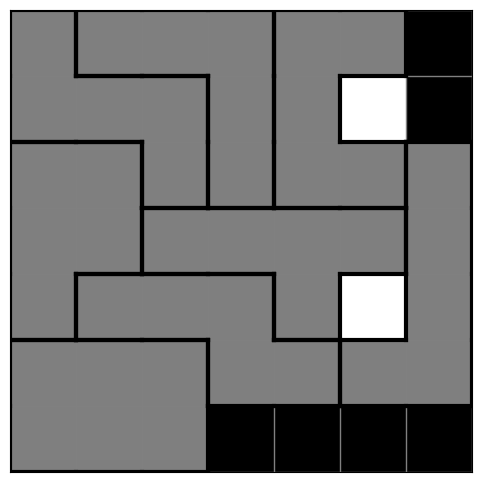

In [109]:
total_rewared = 0
step_count = 0
i = 0
while step_count < 8:
    i += 1
    print(i)
    total_reward, step_count = test_complete_game(model, env)
env.visualize()